# What this notebook teaches

1. Common pandas operations: **.unique**, **.value_counts**, **.where**
2. Common numerical operations with pandas: **.mean**, **.sum**, **.max**, **.idxmax**, **.min**, **.idxmin**, **.diff**
3. masking in pandas : the basics
4. plotting with pandas: **bar**, **line** and **histogram** plots


# Options

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Imports

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Read the data

In [4]:
df = pd.read_csv(os.path.join('data/global-data-on-sustainable-energy.csv'))
df.head(3)
df.shape

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953


(3649, 21)

# Documentation

About the Dataset: 

The data is collected from multiple sources including the World Bank, the International Energy Agency, and ourworldindata.org. [source](https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy)

- **Entity**: The name of the country or region for which the data is reported.
- **Year**: The year for which the data is reported, ranging from 2000 to 2020.
- **Access to electricity (% of population)**: The percentage of population with access to electricity.
- **Access to clean fuels for cooking (% of population)**: The percentage of the population with primary reliance on clean fuels.
- **Renewable-electricity-generating-capacity-per-capita**: Installed Renewable energy capacity per person
- **Financial flows to developing countries (US \$):** Aid and assistance from developed countries for clean energy projects.
- **Renewable energy share in total final energy consumption (\%):** Percentage of renewable energy in final energy consumption.
- **Electricity from fossil fuels (TWh):** Electricity generated from fossil fuels (coal, oil, gas) in terawatt-hours.
- **Electricity from nuclear (TWh):** Electricity generated from nuclear power in terawatt-hours.
- **Electricity from renewables (TWh):** Electricity generated from renewable sources (hydro, solar, wind, etc.) in terawatt-hours.
- **Low-carbon electricity (\% electricity):** Percentage of electricity from low-carbon sources (nuclear and renewables).
- **Primary energy consumption per capita (kWh/person):** Energy consumption per person in kilowatt-hours.
- **Energy intensity level of primary energy (MJ/\$2011 PPP GDP):** Energy use per unit of GDP at purchasing power parity.
- **Value_co2_emissions (metric tons per capita):** Carbon dioxide emissions per person in metric tons.
- **Renewables (\% equivalent primary energy):** Equivalent primary energy that is derived from renewable sources.
- **GDP growth (annual \%):** Annual GDP growth rate based on constant local currency.
- **GDP per capita:** Gross domestic product per person.
- **Density (P/Km2):** Population density in persons per square kilometer.
- **Land Area (Km2):** Total land area in square kilometers.
- **Latitude:** Latitude of the country's centroid in decimal degrees.
- **Longitude:** Longitude of the country's centroid in decimal degrees.

# Let's begin

Seems to be data about countries, which countries are we talking about?

In [7]:
df['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Guiana', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Icelan

A lot of them apparently, how many exactly?

In [8]:
df['Entity'].nunique()

176

Also what is the timeframe we have here?

In [11]:
df['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

How many data for each country?

In [10]:
df['Entity'].value_counts()

Entity
Afghanistan      21
Oman             21
Netherlands      21
New Caledonia    21
New Zealand      21
                 ..
Zimbabwe         21
Serbia           14
Montenegro       14
South Sudan       8
French Guiana     1
Name: count, Length: 176, dtype: int64

It seems most countries have 21 datapoints which are probably one for each year. Some countries don't have all 21 datapoints though

In [ ]:
def check_if_less_than_21(value):
    return value < 21

In [13]:
df['Entity'].value_counts().where(lambda value: value < 21).dropna()
#df['Entity'].value_counts().where(check_if_less_than_21).dropna()

Entity
Serbia           14.0
Montenegro       14.0
South Sudan       8.0
French Guiana     1.0
Name: count, dtype: float64

Countries that don't have the full data: Serbia, Montenegro, South Sudan, French Guiana

There is another way to count how many countries have the full 21 datapoints and how many have other values

In [15]:
df['Entity'].value_counts().value_counts()

count
21    172
14      2
8       1
1       1
Name: count, dtype: int64

# Math operations

## Mean

What is the % population with access to electricity, on average?

In [17]:
df.loc[:,'Access to electricity (% of population)'].mean()

78.93370216207748

## Sum

In total how much $ did these countries send to assist developing countries for clean energy projects?

In [18]:
df.loc[:,'Financial flows to developing countries (US $)'].sum()

146989440000.0

Cool! Let's check this value in billions

In [20]:
df.loc[:,'Financial flows to developing countries (US $)'].sum() / 1_000_000_000

146.98944

$147 billion throughout 2000-2020!

----

## Max, idxmax, Min, idxmin

What is the Country-year that had the most electricity generated from nuclear power?

In [23]:
df['Electricity from nuclear (TWh)'].max()

809.41

Ok this just returned the value of the max, but i actually want to know the Country and respective year where this happened

In [20]:
index = df['Electricity from nuclear (TWh)'].idxmax()
index

3521

In [21]:
df.loc[index,['Entity','Year','Electricity from nuclear (TWh)']]

Entity                            United States
Year                                       2019
Electricity from nuclear (TWh)           809.41
Name: 3521, dtype: object

Wanna do all that in a single step?

In [22]:
df.loc[df['Electricity from nuclear (TWh)'].idxmax(),
       ['Entity','Year','Electricity from nuclear (TWh)']]

Entity                            United States
Year                                       2019
Electricity from nuclear (TWh)           809.41
Name: 3521, dtype: object

----

Country with the least amount of data in this dataset?

In [25]:
df['Entity'].value_counts()#.min()

Entity
Afghanistan      21
Oman             21
Netherlands      21
New Caledonia    21
New Zealand      21
                 ..
Zimbabwe         21
Serbia           14
Montenegro       14
South Sudan       8
French Guiana     1
Name: count, Length: 176, dtype: int64

Oops ran into the same problem again. The minimum is 1, but which country does it refer to?

In [26]:
df['Entity'].value_counts().idxmin()

'French Guiana'

Great!

## A lot more operations


You can check other math operations you can do on Pandas [over here](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#descriptive-statistics)

# Masking

This is cool and all but we can only compute these stats for the whole dataset

![](media/will.jpeg)

In [34]:
df['Entity'].unique()[:5]

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda'], dtype=object)

In [30]:
angola_mask = df['Entity'] == 'Angola'

Let's see what we have here

In [31]:
angola_mask

0       False
1       False
2       False
3       False
4       False
        ...  
3644    False
3645    False
3646    False
3647    False
3648    False
Name: Entity, Length: 3649, dtype: bool

In [32]:
angola_mask.value_counts()

Entity
False    3628
True       21
Name: count, dtype: int64

- A series with a bunch of Falses and some Trues
- The **True** values are for the rows where the condition above is ... well ... True!

![](media/what.jpeg)

In [39]:
df.loc[angola_mask,:]

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
63,Angola,2000,24.212744,41.1,14.37,NaN,73.44,0.50,0.0,0.90,...,1979.2562,3.68,16200.00000,NaN,3.054624,556.838632,26,1246700.0,-11.202692,17.873887
64,Angola,2001,20.000000,41.7,13.90,NaN,72.34,0.58,0.0,1.01,...,2079.7320,3.65,15960.00000,NaN,4.205999,527.333529,26,1246700.0,-11.202692,17.873887
65,Angola,2002,26.352118,41.7,13.46,NaN,70.42,0.58,0.0,1.13,...,2143.5280,3.34,15689.99958,NaN,13.665687,872.494442,26,1246700.0,-11.202692,17.873887
66,Angola,2003,27.412777,42.0,13.01,50000.0,65.14,0.71,0.0,1.23,...,2298.9023,3.49,16760.00023,NaN,2.989850,982.961008,26,1246700.0,-11.202692,17.873887
67,Angola,2004,28.470550,41.9,26.44,40000.0,61.92,0.45,0.0,1.73,...,2454.6700,3.17,17450.00076,NaN,10.952862,1255.564513,26,1246700.0,-11.202692,17.873887
68,Angola,2005,29.527786,42.6,25.53,NaN,68.38,0.53,0.0,2.20,...,2016.8517,2.60,15810.00042,NaN,15.028915,1902.422150,26,1246700.0,-11.202692,17.873887
69,Angola,2006,30.586895,42.9,24.63,NaN,62.13,0.60,0.0,2.64,...,2453.2468,2.62,16559.99947,NaN,11.547683,2599.565948,26,1246700.0,-11.202692,17.873887
70,Angola,2007,37.500000,43.5,36.27,760000.0,58.49,0.68,0.0,2.47,...,2719.0603,2.50,16969.99931,NaN,14.010018,3121.996085,26,1246700.0,-11.202692,17.873887
71,Angola,2008,38.490000,43.6,36.52,NaN,54.88,0.96,0.0,3.10,...,3072.0240,2.48,19280.00069,NaN,11.166138,4080.941034,26,1246700.0,-11.202692,17.873887
72,Angola,2009,33.802190,43.8,35.22,NaN,52.41,1.54,0.0,3.06,...,3368.8357,2.71,21149.99962,NaN,0.858713,3122.781599,26,1246700.0,-11.202692,17.873887


Now we can ask questions for specific subgroups of our data!

Let's see what we can learn about Angola here:

How did the Access to electricity evolved throughout the years for Angola?

In [34]:
df.loc[angola_mask,'Access to electricity (% of population)'].diff()

63          NaN
64    -4.212744
65     6.352118
66     1.060659
67     1.057773
68     1.057236
69     1.059109
70     6.913105
71     0.990000
72    -4.687810
73     1.093448
74    -0.295638
75     2.531320
76     1.146710
77    -6.278030
78    10.000000
79    -0.186870
80     1.200130
81     2.276740
82     0.352800
83     1.247810
Name: Access to electricity (% of population), dtype: float64

`.diff` will:
- compute differences for each row
- Will have Nan on the first row because there's no previous row to compare it to

would be cool to assign the year as index here to understand better this analysis

In [36]:
df.loc[angola_mask,:].set_index('Year')['Access to electricity (% of population)'].diff()

Year
2000          NaN
2001    -4.212744
2002     6.352118
2003     1.060659
2004     1.057773
2005     1.057236
2006     1.059109
2007     6.913105
2008     0.990000
2009    -4.687810
2010     1.093448
2011    -0.295638
2012     2.531320
2013     1.146710
2014    -6.278030
2015    10.000000
2016    -0.186870
2017     1.200130
2018     2.276740
2019     0.352800
2020     1.247810
Name: Access to electricity (% of population), dtype: float64

Most of the years, we have a positive difference which means more and more people in Angola have been getting access to electricity

In [37]:
(df
 .loc[angola_mask,'Access to electricity (% of population)']
 .diff()
 .sum()
)

22.677866

From 2000 till 2020, Angola enabled access to an additional 22% of its population!

In [38]:
# another way of getting the same result

df.loc[angola_mask, 'Access to electricity (% of population)'].iloc[-1] - df.loc[angola_mask, 'Access to electricity (% of population)'].iloc[0]

22.677866

# Plotting

Now, this type of analysis is begging for a visualization

In [55]:
angola_evolution_electricity_access = df.loc[angola_mask].set_index('Year').loc[:,'Access to electricity (% of population)'].diff()
angola_evolution_electricity_access.head(5)

Year
2000         NaN
2001   -4.212744
2002    6.352118
2003    1.060659
2004    1.057773
Name: Access to electricity (% of population), dtype: float64

## bar plots

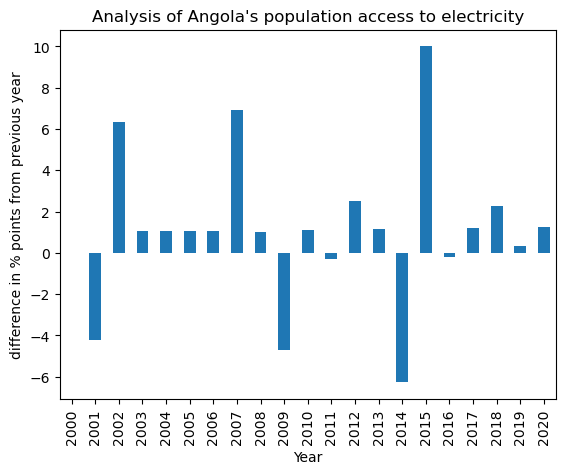

In [61]:
angola_evolution_electricity_access.plot.bar(title='Analysis of Angola\'s population access to electricity',xlabel='Year', ylabel='difference in % points from previous year');

## Line plots

Line plots are particularly useful to visualize something across time

Let's visualize the growth of this `electricity_access` in another way

<Axes: title={'center': '(Angola) Growth in % population with access to electricity'}, xlabel='Year', ylabel='% population'>

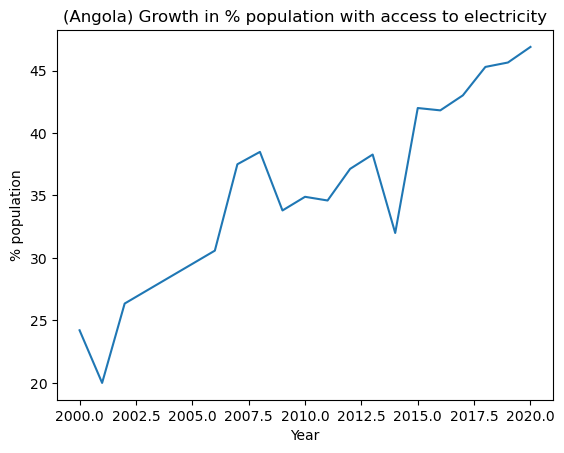

In [84]:
(df
 .loc[angola_mask]
 .set_index('Year')
 .loc[:,'Access to electricity (% of population)']
 .plot(title='(Angola) Growth in % population with access to electricity', ylabel='% population')
)

Now the x axis isn't perfect, there's a lot of ways to solve this situation which you will be using google, stackOverflow and chatgpt most of the time to solve, but here is one simple solution

<Axes: title={'center': '(Angola) Growth in % population with access to electricity'}, xlabel='Year', ylabel='% population'>

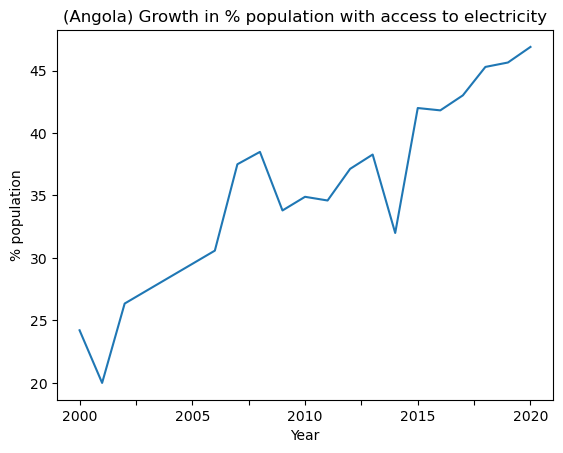

In [86]:
(df
 .loc[angola_mask]
 .astype({'Year':'str'})
 .set_index('Year')
 .loc[:,'Access to electricity (% of population)']
 .plot(title='(Angola) Growth in % population with access to electricity', ylabel='% population')
)

## histogram plots

Density plots are very useful because they give you a lot more information about a distribution than just its average

What is the distribution of co2 emissions in the year 2010?

In [40]:
mask_2010 = df['Year'] == 2010

before the plot, `.describe` is a quick way to also have a notion of a distribution

In [42]:
df.loc[mask_2010,'Value_co2_emissions_kt_by_country'].describe().astype(int)

count        162
mean      165706
std       802553
min            9
25%         2452
50%        10489
75%        61397
max      8474919
Name: Value_co2_emissions_kt_by_country, dtype: int64

But we can also plot to get more information about the distribution

<Axes: ylabel='Frequency'>

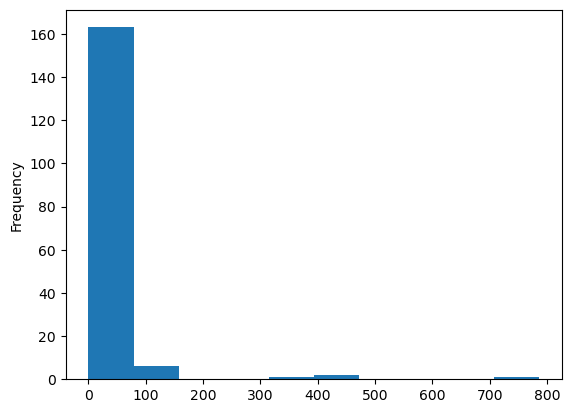

In [102]:
df.loc[mask_2010,'Electricity from renewables (TWh)'].plot.hist()

You can control the number of bins

<Axes: ylabel='Frequency'>

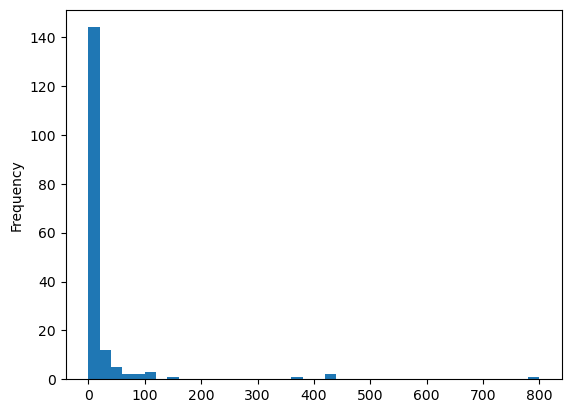

In [45]:
df.loc[mask_2010,'Electricity from renewables (TWh)'].plot.hist(bins = range(0,800+1,20))

or if you don't want to focus on the outliers

<Axes: ylabel='Frequency'>

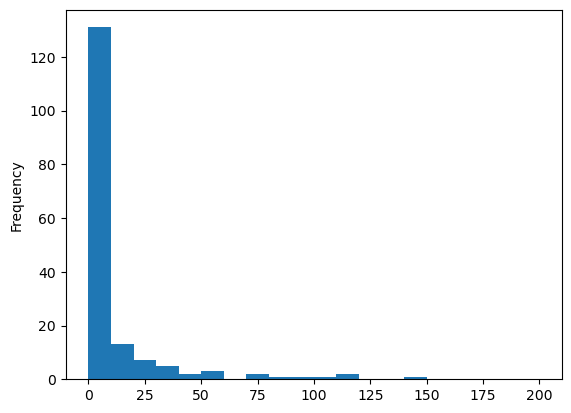

In [46]:
df.loc[mask_2010,'Electricity from renewables (TWh)'].plot.hist(bins = range(0,200+1,10))

![](media/dog.jpeg)

Now proceed to the exercises notebook